In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv("train_data.csv")
resources_df = pd.read_csv("resources.csv")

In [4]:
resources_df['total_cost'] = resources_df['price'] * resources_df['quantity']

# Group by project ID to get total cost per project
project_cost_df = resources_df.groupby('id')['total_cost'].sum().reset_index()
project_cost_df.columns = ['id', 'project_total_cost']
merged_df = pd.merge(train_df, project_cost_df, on='id', how='left')

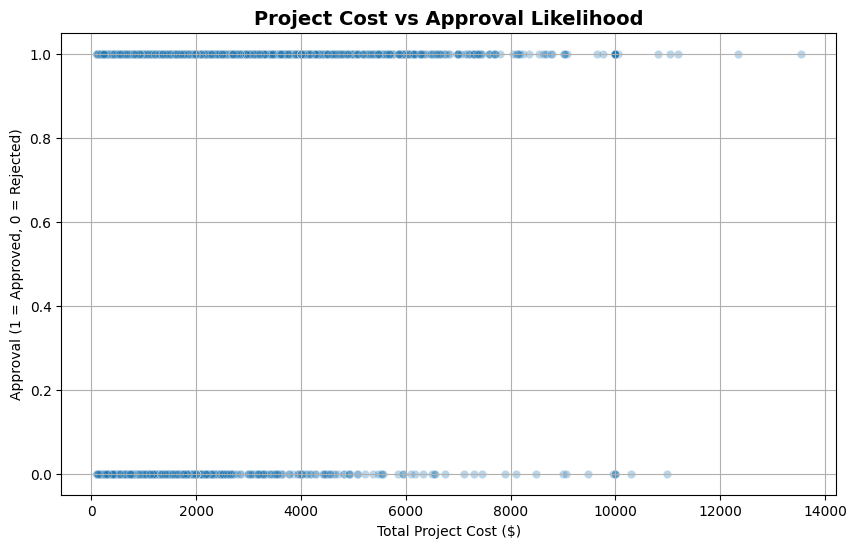

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='project_total_cost',
    y='project_is_approved',
    alpha=0.3
)
plt.title("Project Cost vs Approval Likelihood", fontsize=14, fontweight='bold')
plt.xlabel("Total Project Cost ($)")
plt.ylabel("Approval (1 = Approved, 0 = Rejected)")
plt.grid(True)
plt.show()

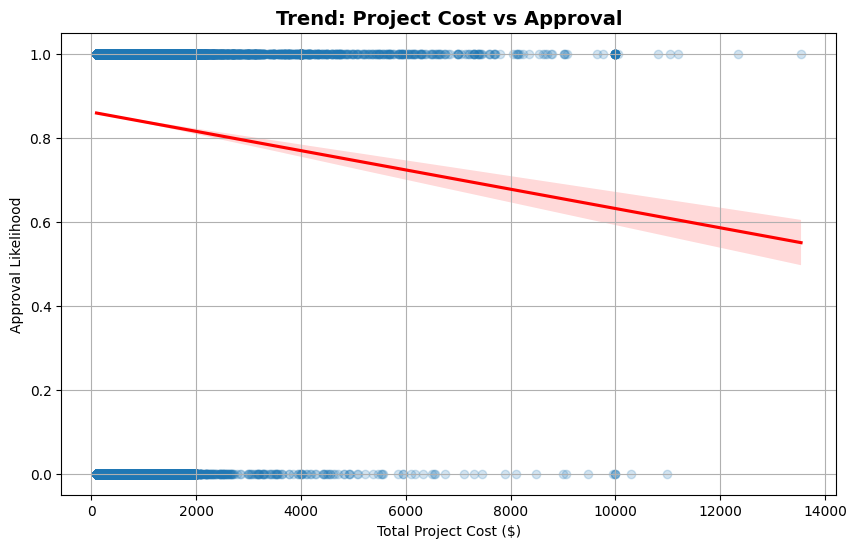

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_df,
    x='project_total_cost',
    y='project_is_approved',
    scatter_kws={'alpha':0.2},
    line_kws={'color':'red'}
)
plt.title("Trend: Project Cost vs Approval", fontsize=14, fontweight='bold')
plt.xlabel("Total Project Cost ($)")
plt.ylabel("Approval Likelihood")
plt.grid(True)
plt.show()


/var/folders/hc/j0rjcg4n05bgq9gc6dylx2z00000gn/T/ipykernel_3655/449237841.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_bin_summary = merged_df.groupby('cost_bin')['project_is_approved'].mean().reset_index()
/var/folders/hc/j0rjcg4n05bgq9gc6dylx2z00000gn/T/ipykernel_3655/449237841.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cost_bin_summary, x='cost_bin', y='project_is_approved', palette='viridis')


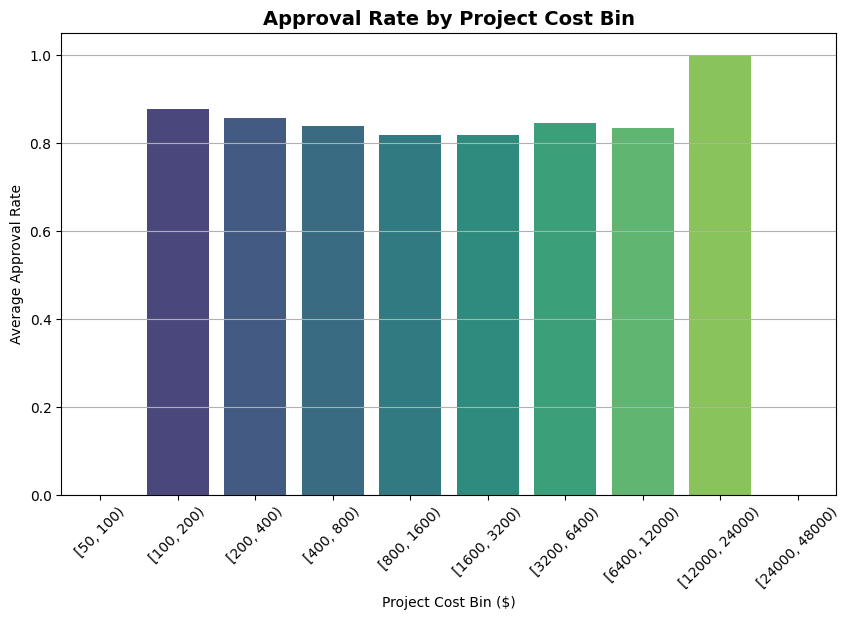

In [17]:
# Create cost bins
merged_df['cost_bin'] = pd.cut(merged_df['project_total_cost'], bins=[50,100, 200, 400, 800, 1600, 3200, 6400, 12000, 24000, 48000], right=False)

# Aggregate approval rate per bin
cost_bin_summary = merged_df.groupby('cost_bin')['project_is_approved'].mean().reset_index()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cost_bin_summary, x='cost_bin', y='project_is_approved', palette='viridis')
plt.xticks(rotation=45)
plt.title("Approval Rate by Project Cost Bin", fontsize=14, fontweight='bold')
plt.xlabel("Project Cost Bin ($)")
plt.ylabel("Average Approval Rate")
plt.grid(axis='y')
plt.show();


### Hypothesis Testing
- Null Hypothesis (H₀): There is no linear correlation between project cost and approval likelihood (i.e., Pearson correlation ρ = 0).
- Alternative Hypothesis (H₁): There is a linear correlation between project cost and approval likelihood (i.e., ρ ≠ 0).

In [22]:
merged_df = merged_df.dropna(subset=['project_total_cost', 'project_is_approved'])

from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(merged_df['project_total_cost'], merged_df['project_is_approved'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

Pearson Correlation Coefficient: -0.0350
P-value: 5.1836e-31


In [23]:
if p_value < 0.05:
    print("Result: Statistically significant. Reject H₀. There is a linear correlation.")
else:
    print("Result: Not statistically significant. Fail to reject H₀. No linear correlation.")

Result: Statistically significant. Reject H₀. There is a linear correlation.
